# STROKE PREDICTION

**According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally,
responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely
to get stroke based on the input parameters like gender, age, glucose level, and smoking status.
Each row in the data provides relavant information about the patient.**

In [1]:
# Importing necessary libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Collection

In [2]:
stroke_df = pd.read_csv("healthcare_stroke_data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke_df.tail() # Function could be used to present the last five rows in the dataframe

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
stroke_df.shape

(5110, 12)

In [5]:
stroke_df.info()  ## This method prints information about a DataFrame, 
# including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**1.Categorical and Numerical features are present**

    * Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status.
    * Binary Numerical Features: hypertension,heart_disease, stroke.
    * Continous Numerical Features : age, avg_glucose_level, bmi.

In [6]:
stroke_df.isnull().sum()# get the number of missing data points per column

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* **There are a total of 5110 patients.**

* **There are some categorical features in the data. So we need to encode them into numeric features later on.**

* **There are 201 missing values in the data, .describe() function is used to check whether the "mean" values are close
    enough to the median. If they are close enough, it can be assumed that the mean is robust enough and the data
    doesnt really contain a lot of extreme outliers.**


# Preprocessing & EDA

**Since the mean and the median values are pretty close in the "bmi" column of the dataframe,
the mean values can be used to fill the null.**

In [8]:
#Fill the missing values
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(), inplace=True)

In [9]:
# Gender VS Stroke
stroke_df.groupby('gender').stroke.value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Stroke')

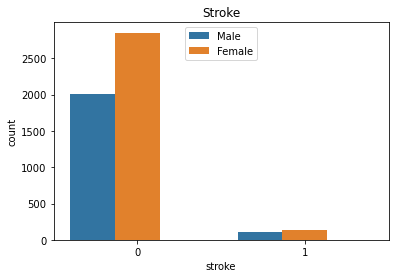

In [10]:
#plot the target variable
sns.countplot(x="stroke", data=stroke_df, hue='gender')
plt.legend(["Male","Female"])
plt.title("Stroke")

**Total number of female who got stroke is bigger than male**

0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:title={'center':' Stroke Distribution'}, ylabel='stroke'>

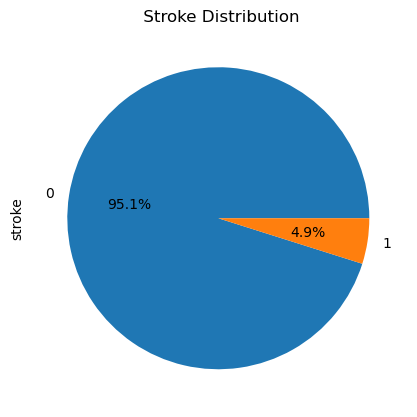

In [11]:
print(stroke_df["stroke"].value_counts())

plt.figure(1, figsize=(5,5), dpi = 100)
plt.title(" Stroke Distribution")
stroke_df['stroke'].value_counts().plot.pie(autopct="%1.1f%%")

**Here in this pie chart, It is clear that about 4.9% had stroke and the remaining 95% had no stroke.**
* Almost %95 of the instances of our target variable is 'No stroke'
* 4860 patient does not have a stroke
* %5 of the instances of our target variable is 'Stroke'
* 249 patient have a stroke.
* Looks like we have an imbalanced data.

In [12]:
# Drop 'id' column
stroke_df = stroke_df.drop('id', axis=1)

# Round 'age' column and convert data type to integer
stroke_df.age = stroke_df.age.round().astype('int')

# Drop 'Other', Because only one patient has 'other'
stroke_df.drop(stroke_df.loc[stroke_df['gender']=='Other'].index, inplace=True)

In [13]:
#Let's see our numerical and categorical features seperately.
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
               'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [14]:
stroke_df[numerical].describe()

,age,avg_glucose_level,bmi
count,5109.000000,5109.000000,5109.000000
mean,43.229986,106.140399,28.894508
std,22.613660,45.285004,7.698235
min,0.000000,55.120000,10.300000
25%,25.000000,77.240000,23.800000
50%,45.000000,91.880000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


* **Based on the mean & median score differences, we can expect.**

* **Slightly left skew on the 'age' (mean: 43.22 & median: 45).**
* **Slightly right skew on the 'bmi' (mean: 28.89 & median: 28.40).**
* **And right skew distribution on the 'avg_glucose_level' (mean: 106.14 & median: 91.88).**

In [15]:
stroke_df[numerical].skew() # Skewness result

age                 -0.137470
avg_glucose_level    1.572815
bmi                  1.076458
dtype: float64

**Univariate Analysis**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

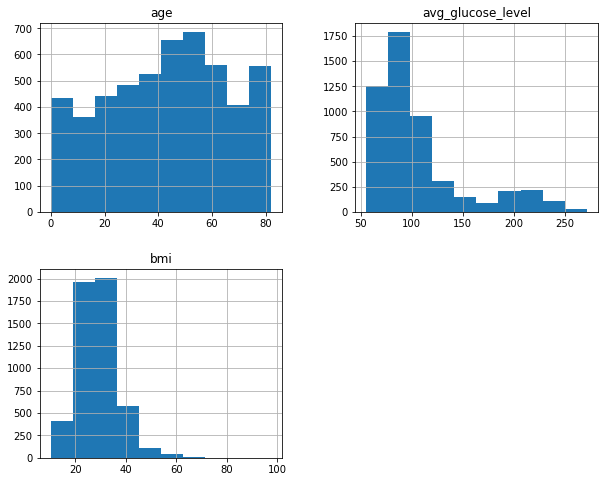

In [16]:
# Plot on numerical features
stroke_df[numerical].hist(figsize=(10,8))

* **As seen in both skewness result and histograms, numerical features have skewness in different degrees.**

In [17]:
stroke_df[['age','avg_glucose_level','bmi','stroke']].corr()

,age,avg_glucose_level,bmi,stroke
age,1.000000,0.238331,0.325859,0.245225
avg_glucose_level,0.238331,1.000000,0.168910,0.131991
bmi,0.325859,0.168910,1.000000,0.038912
stroke,0.245225,0.131991,0.038912,1.000000


* **When age increases, the mean score of the stroke also increases.**
* **Average glucose level's mean scores have differences between a person who has a stroke or not.**
* **Bmi mean scores are close to each other.**
* **Correlations with the target variable are very small.**

**Bivariate Analysis**

**Age Vs Avg_glucose_level**

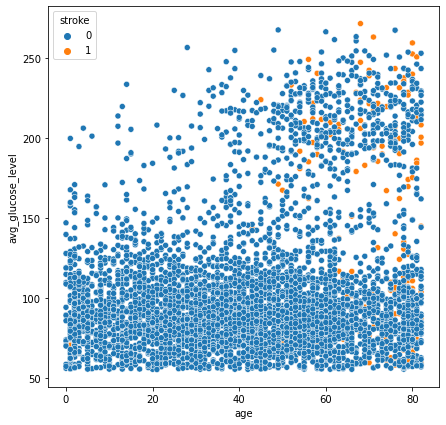

In [18]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=stroke_df, x="age", y="avg_glucose_level", hue='stroke')
plt.show()

**In this plot we can see that the normal avg of blood in sugar is less than 140 and blood-sugar level is higher in aged people.**

**Age Vs BMI**

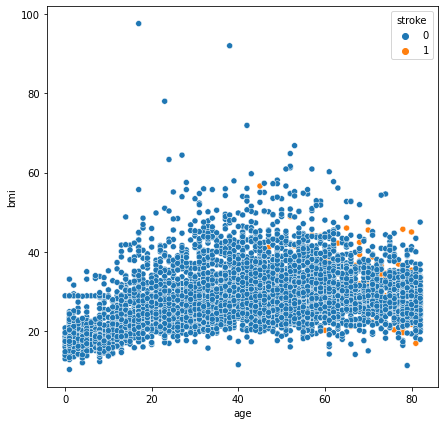

In [19]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=stroke_df, x="age", y="bmi", hue='stroke')
plt.show()

**From the above Age vs BMI plot we can clearly see that when people attain an age of 40 or greater the chances
of getting a stroke increases and after 60+ it tends to increase even more. Also, people with a BMI of 25+ have
shown a higher chances of encountering a stroke.**

**BMI Vs Average_glucose_level**

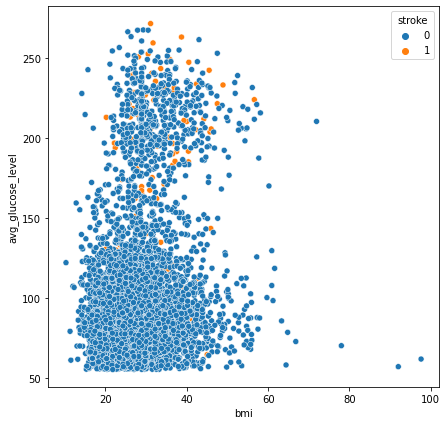

In [20]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=stroke_df, x="bmi", y="avg_glucose_level", hue='stroke')
plt.show()

**BMI and Glucose levels confirm that people with less than 150 glucose levels are less prone to strokes than 
people with glucose levels more than 150 level. BMI >40 have low avg glucose.**

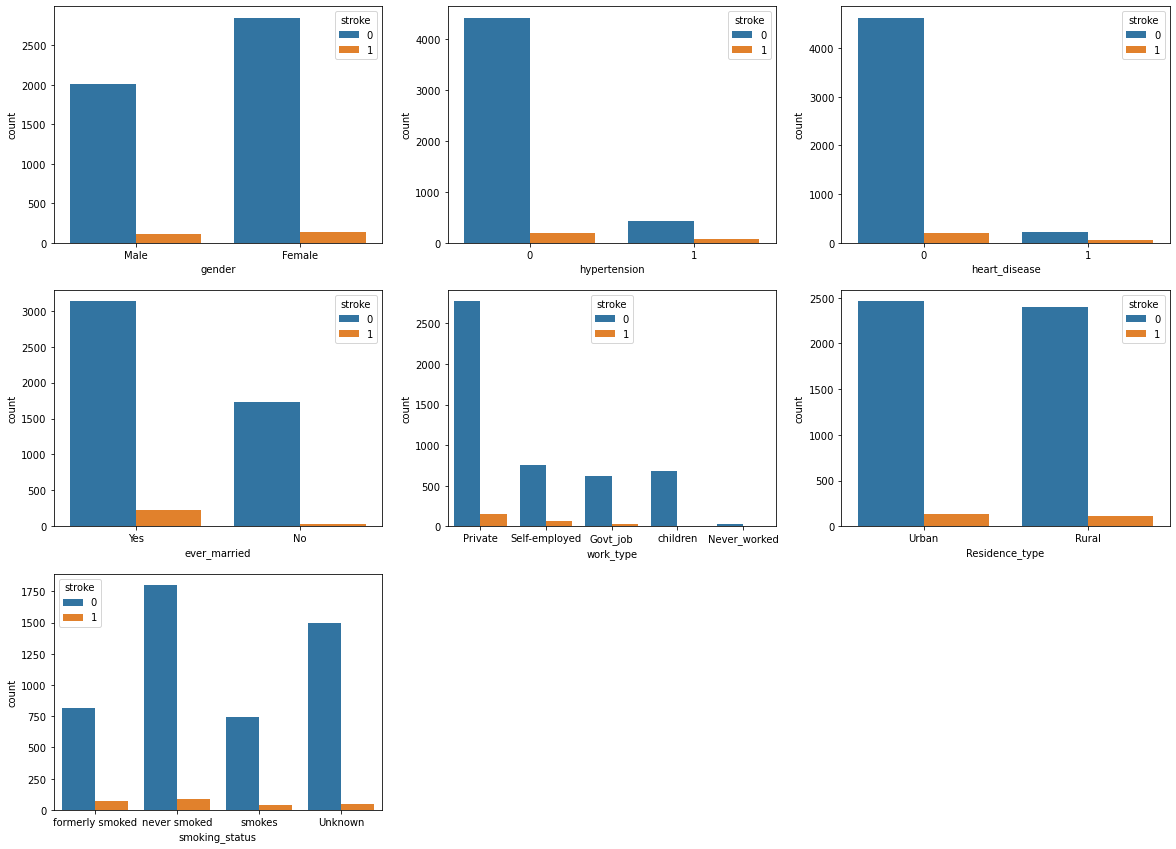

In [21]:
# PLot on categorical features

index = 0
plt.figure(figsize=(20,20))
for feature in categorical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.countplot(data = stroke_df, x =feature, hue = "stroke")

* Male compare to female are more likelyto get stroke, but difference between female and male is very small.
* Person with hypertension are more likely to get stroke than the ones who don't have hypertension.
* Most people who have had a stroke do not have any heart disease.
* The people who got married show signs of stroke way more than people who are unmarried.
* Private employees seems to experience stroke more than other work_types(may be due to work pressure).
  Self-employed people do show signs of stroke(may be due to reasons like heart disease,tension etc). Children can be ignored.
* Almost no difference between people living in urban and rural areas in terms of stroke occurence.
* People who formerly smoked and who smoke (combined) are showing signs of stroke way more than people who never smoked

# Encoding

In [22]:
stroke_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [23]:
# One hot-Encoding
stroke_enc = pd.get_dummies(stroke_df)
stroke_enc.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61,0,0,202.21,28.893237,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80,0,1,105.92,32.500000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49,0,0,171.23,34.400000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [24]:
x = stroke_enc.drop(["stroke","smoking_status_Unknown","work_type_Never_worked","work_type_children"], axis=1)
y = stroke_enc["stroke"]

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [26]:
#min-max scaling
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))
x = min_max.fit_transform(x)
x = pd.DataFrame(x)

# Model Selection

* **LogisticRegression**

In [27]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000)
model.fit(x_train,y_train)

prediction=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9393346379647749


* **Support Vector Machine(SVM)**

In [28]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train,y_train)

prediction=model.predict(x_test)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the SVM is: 0.9393346379647749


* **K-Nearest Neighbours(KNN)**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    acc = accuracy_score(y_test,prediction)
    acc_values.append(acc)

In [30]:
acc_values

[0.9334637964774951,
 0.9354207436399217,
 0.9324853228962818,
 0.9383561643835616,
 0.9354207436399217,
 0.9383561643835616,
 0.9363992172211351,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749,
 0.9393346379647749]

Text(0, 0.5, 'accuracy')

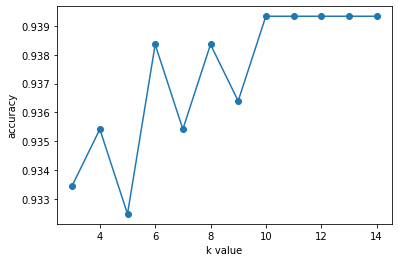

In [31]:
plt.plot(neighbors, acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [32]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9334637964774951


* **DecisionTreeClassifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

prediction=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9031311154598826


In [34]:
#To optimize the model we use Pre-pruning
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf.fit(x_train,y_train)
#predict on the test data
prediction=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9393346379647749


* **RandomForestClassifier**

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

prediction=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9393346379647749


With the help of **cross validation** we evaluate the performance of each model using recall and accuracy score.
By simply taking the mean of both scores, we know which model has the highest score indicating it has the best performance 

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [37]:
all_model = [LogisticRegression(max_iter=3000), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(),SVC()]

In [38]:
recall = []
accuracy = []

for model in all_model:
    cv = cross_val_score(model, x_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)

    cv = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)

In [39]:
model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'SVC']

score = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})
score

,Model,Accuracy,Recall
0,LogisticRegression,0.954246,0.005263
1,KNeighborsClassifier,0.949594,0.016082
2,DecisionTreeClassifier,0.913382,0.137427
3,RandomForestClassifier,0.952289,0.005556
4,SVC,0.954246,0.000000


Performance of each model is shown in the table above. In this particular case, it's better to have a high recall 
since we don't want to predict someone has no stroke, but someone actually has stroke. From this consideration,
We choose **Decision Tree Classifier** as our final model.

In [40]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
prediction=dtc.predict(x_test)

In [41]:
print(confusion_matrix(y_test, prediction, labels=(1,0)))
print(classification_report(y_test, prediction))

[[ 12  50]
 [ 48 912]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.20      0.19      0.20        62

    accuracy                           0.90      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.90      0.90      0.90      1022



# Fine tuning Decision Tree using RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3,5,15],
              "max_features": [3,5,10],
              "min_samples_leaf": [3,5,10],
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 5, 'max_features': 5, 'max_depth': 3, 'criterion': 'entropy'}
Best score is 0.9514583185587975


**Conclusion**

**In this entire work, we build a machine learning model to predict whether someone has high risk of
getting stroke or not. We decided using Decision Tree Classifier as our final model since it has
the highest recall score and good accuracy score as well.** 